In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import string

In [3]:
df_transit = pd.read_excel('../../../data/raw/2021 Fuel and Energy_static_0.xlsx', sheet_name='Fuel and Energy')
df_transit=df_transit.loc[df_transit['State'] == "CT"]
df_transit=df_transit[['Agency','City','TOS','Primary UZA Population','Mode','TOS','Mode VOMS','Fuel/Energy Used:','Diesel (gal)','Gasoline (gal)','Miles Traveled by Vehicles Fueled by:','Diesel','Gasoline','Miles per Gallon/KwH:',
                                'Diesel (mpg)','Gasoline (mpg)']]

In [4]:
#calculation of the carbon dioxide emission based on the fuel( two main fuels: gasoline, diesel)
gasoline=8.78
diesel=10.21

#calculation of the methane and nitrous oxide emission based on the vmt, comes from the lggit the heavy-truck vehicle
#CH4
gasoline_1=0.0577
diesel_1=0.0051

#N2O
gasoline_2=0.1468
diesel_2=0.0048

#unis is metric tons, from lggit 
CO2_Emissions=df_transit['Gasoline (gal)']*gasoline/1000+df_transit['Diesel (gal)']*diesel/1000
CH4_Emissions=df_transit['Gasoline']*gasoline_1/1000000+df_transit['Diesel']*diesel_1/1000000
N2O_Emissions=df_transit['Gasoline']*gasoline_2/1000000+df_transit['Diesel']*diesel_2/1000000

CO2_equ_CH4=CH4_Emissions*25
CO2_equ_N2O=N2O_Emissions*298

ghg_Emissions=CO2_Emissions+CO2_equ_CH4+CO2_equ_N2O
df_transit['GHG Emissions (kTCO2e)']=ghg_Emissions/1000

#compare then gasoline emission and diesel emissions
df_transit['Gasoline Emissions (kTCO2e)']=(df_transit['Gasoline (gal)']*gasoline/1000+df_transit['Gasoline']*gasoline_1/1000000*21+df_transit['Gasoline']*gasoline_2/1000000*310)/1000# conver to kiloton
df_transit['Diesel Emissions (kTCO2e)']=(df_transit['Diesel (gal)']*diesel/1000+df_transit['Diesel']*diesel_1/1000000*21+df_transit['Diesel']*diesel_2/1000000*310)/1000

In [7]:
df_transit['MSA']=["Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown",'New Haven-Milford','New Haven-Milford','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk',
               'New Haven-Milford','Bridgeport-Stamford-Norwalk','Bridgeport-Stamford-Norwalk',"Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown","Hartford-East Hartford-Middletown",'New London','New London', "Hartford-East Hartford-Middletown",'New Haven-Milford','New Haven-Milford','New Haven-Milford']       

In [8]:
#summation of all transit system in the same MSAs
sum_gaso = df_transit.groupby('MSA')['Gasoline Emissions (kTCO2e)'].sum()
sum_diesel = df_transit.groupby('MSA')['Diesel Emissions (kTCO2e)'].sum()
sum_total = df_transit.groupby('MSA')['GHG Emissions (kTCO2e)'].sum()

def add_values(x, y):
    return x + y

s3 = sum_gaso.combine(sum_diesel, add_values)

In [9]:
data = [['Gasoline Emissions',sum_gaso], ['Diesel Emissions', sum_diesel], ['Total Emissions',sum_total]]
df_emission = pd.DataFrame(data, columns=['MSA', 'Emissions'])

df = pd.DataFrame({'Gasoline Emissions': sum_gaso[0:3], 'Diesel Emissions':sum_diesel[0:3], 'Total Emissions':sum_total[0:3]})

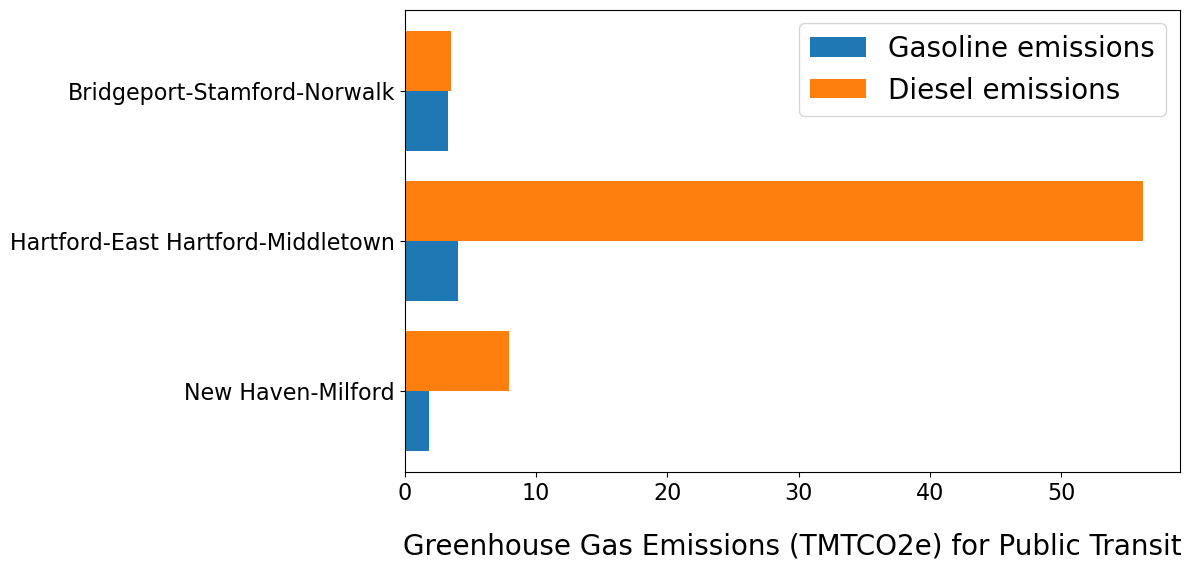

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
Gasoline = df['Gasoline Emissions']
Diesel = df['Diesel Emissions']

Y_axis = np.arange(len(X))

plt.barh(Y_axis -0.2, Gasoline, 0.4, label='Gasoline emissions')
plt.barh(Y_axis +0.2, Diesel, 0.4, label='Diesel emissions')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (TMTCO2e) for Public Transit",fontsize=20, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../../../figures/ghg-emission-transit-bus.png', dpi=600,bbox_inches='tight')

In [14]:
#percentage of CT transit take the entire emisisons of each MSAs(%)
por_NH=6.8871*0.1/2.8754
por_HH=60.2653*0.1/4.3553
por_BSN=9.8471*0.1/2.9689

In [15]:
print(por_NH,por_HH,por_BSN)

0.23951798010711556 1.3837232796822265 0.3316750311563205
